In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [2]:
import pandas as pd
dataset = pd.read_csv("creditcard.csv")
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


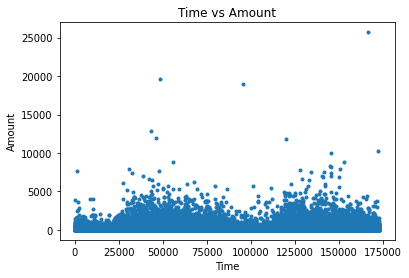

In [3]:
a1 = dataset["Time"]
a2 = dataset["Amount"]
import matplotlib.pyplot as plt
plt.title("Time vs Amount")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.plot(a1,a2,'.')
plt.show()


In [4]:
import numpy as np
std1 = (a1-np.mean(a1))/np.std(a1)
std2 = (a2-np.mean(a2))/np.std(a2)
std3 = np.array([std1.T, std2.T])

In [5]:
covariance = np.cov(np.array([std1,std2]))

In [6]:
from numpy import linalg as LA
eigen_val, eigen_vectors = LA.eig(covariance)
print(eigen_val)
print(eigen_vectors)

[0.9894071  1.01059992]
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


In [8]:
new_feature = np.matmul(std3.T, eigen_vectors[1:].T)
new_feature[:5 :]


array([[1.2385815 ],
       [1.65396347],
       [0.59105362],
       [1.31240978],
       [1.46367161]])

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
decomposed_pcs = pca.fit_transform(std3.T)
decomposed_pcs[:5, :]

array([[1.58501329],
       [1.16963132],
       [2.23251139],
       [1.51115523],
       [1.35986362]])

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
decomposed_pcs = pca.fit_transform(std3.T)
decomposed_pcs

array([[ 1.58501329, -1.2385815 ],
       [ 1.16963132, -1.65396347],
       [ 2.23251139, -0.59105362],
       ...,
       [-1.21891972,  1.10318147],
       [-1.38255076,  0.93955044],
       [-0.79740603,  1.52481429]])